<a href="https://colab.research.google.com/github/mz-zarei/TimeSeriesAnalysis/blob/main/PedestrianFlowForecasting/PedCrossVolumeModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
import os

# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline

In [26]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/20180525-20200416-Milton-Ped-Volume-Per-Crosswalk.csv', delimiter=';')
# # Combine date/time columns and change the type to datetime 
df['date'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
# Set index as date column and sort
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
# Drop unused columns
df.drop(columns=['latitude', 'longitude', 'time', 'vol_vehicle'], inplace=True)
# Unique intersections
print(df.name.unique())
# Show first 10 rows
display(df.head())

['Thompson Road and McCuaig Drive' 'Thompson Road and Nipissing Road'
 'James Snow Parkway and Derry Road' 'Thompson Road and Laurier Avenue'
 'Thompson Road and Main Street' 'Ontario Street South and Childs Drive'
 'Ontario Street South and Pine Street'
 'Main Street East and Ontario Street North'
 'Main Street East and Mall Entrance'
 'Bronte Street North and Main Street West'
 'Martin Street and Main Street East' 'Main Street and Sherwood'
 'Laurier Avenue and Ontario Street South'
 'Louis St Laurent Avenue and Commercial Plaza'
 'Thompson Road and Drew Centre'
 'Louis St Laurent Avenue and Farmstead Drive'
 'Main Street E and Harris / Pearson'
 'Main Street East and Leisure Centre Driveway'
 'Main Street East and Maple / Sinclair' 'Fifth Line and Yukon Court'
 'Thompson Road North and Maple Avenue'
 'Thompson Road North and Woodward Avenue'
 'Steeles Avenue East and Martin Street'
 'Main Street West and Scott Boulevard']


,id,name,ped_N,ped_S,ped_E,ped_W
date,,,,,,
2018-05-25 15:00:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,0,0,0,0
2018-05-25 15:15:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,0,0,0,0
2018-05-25 15:30:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,0,0,0,0
2018-05-25 15:45:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,0,0,0,0
2018-05-25 16:00:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,0,0,0,0


In [27]:
# Choose one/more intersection
df = df[df['name'] == 'Ontario Street South and Childs Drive']
# drop data after 2019-01-01
df = df[df.index > "2019-01-01"]

In [28]:
# Check if there is any Null target values
print('Number of null values (ped_N): {0}'.format(df.ped_N.isnull().sum()))
print('Number of null values (ped_S): {0}'.format(df.ped_S.isnull().sum()))
print('Number of null values (ped_E): {0}'.format(df.ped_E.isnull().sum()))
print('Number of null values (ped_W): {0}'.format(df.ped_W.isnull().sum()))

Number of null values (ped_N): 0
Number of null values (ped_S): 0
Number of null values (ped_E): 0
Number of null values (ped_W): 0


In [29]:
# Resample data to get daily or weekly or monthly counts
aggregation = 'D'
df_r = df.resample(aggregation).sum()

# Check for duplicate index values
print('Duplicate dates in our data (before): ', df_r.index.duplicated().sum())

# Summary statistics
df_r.describe()

Duplicate dates in our data (before):  0


,ped_N,ped_S,ped_E,ped_W
count,472.0,472.0,472.0,472.0
mean,20.9,11.0,42.4,25.5
std,9.3,10.4,20.5,13.7
min,2.0,0.0,0.0,0.0
25%,15.0,5.0,26.0,16.0
50%,20.0,9.0,40.0,24.0
75%,26.0,15.0,57.0,34.0
max,66.0,97.0,110.0,70.0


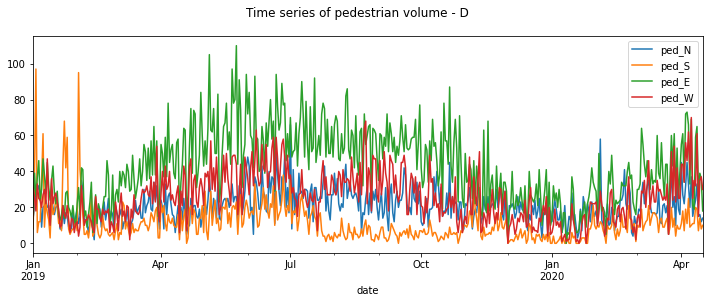

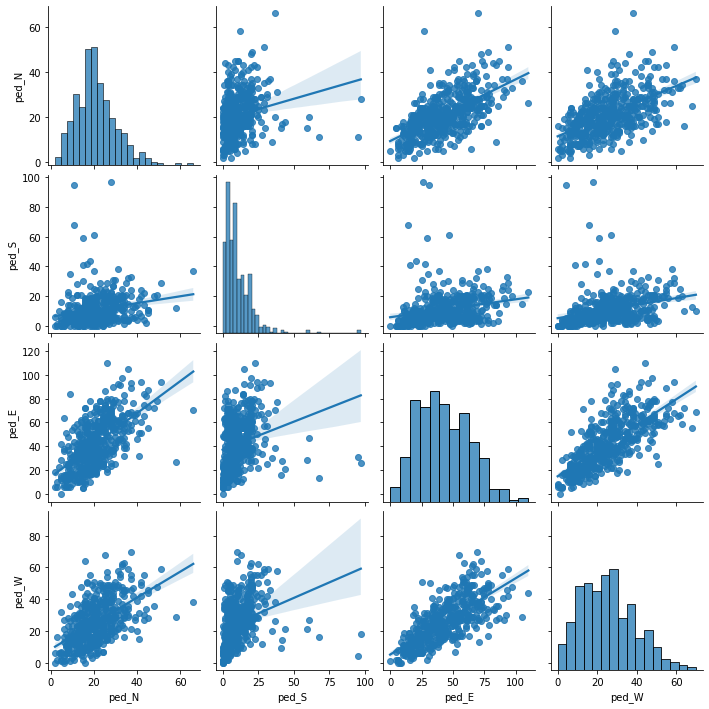

In [30]:
# Plotting the time series of Ped counts for each crossing
fig, axs = plt.subplots(1, figsize=(12, 4))
fig.suptitle('Time series of pedestrian volume - ' + aggregation)

df_r.ped_N.plot(ax=axs)
df_r.ped_S.plot(ax=axs)
df_r.ped_E.plot(ax=axs)
df_r.ped_W.plot(ax=axs)
axs.legend()
plt.show()

# Distributions and scatter pair plots
sns.pairplot(df_r, kind='reg')

In [31]:
# Statistical tests for distributions
from scipy import stats

## T-test for mean
print('t-test ped_N/ped_S: ', stats.ttest_ind(df_r.ped_N.values, df_r.ped_S.values)[1])
print('t-test ped_W/ped_E: ', stats.ttest_ind(df_r.ped_E.values, df_r.ped_W.values)[1])

## Leven Test for variance
print('Leven-test ped_N/ped_S: ', stats.levene(df_r.ped_N.values, df_r.ped_S.values)[1])
print('Leven-test ped_W/ped_E: ', stats.levene(df_r.ped_E.values, df_r.ped_W.values)[1])

## KS Test for distrbution
print('KS-test ped_N/ped_S: ', stats.ks_2samp(df_r.ped_N.values, df_r.ped_S.values)[1])
print('KS-test ped_W/ped_E: ', stats.ks_2samp(df_r.ped_E.values, df_r.ped_W.values)[1])

t-test ped_N/ped_S:  1.5650208559244433e-48
t-test ped_W/ped_E:  6.102068696101359e-45
Leven-test ped_N/ped_S:  0.2281657541008601
Leven-test ped_W/ped_E:  1.6331578923123236e-17
KS-test ped_N/ped_S:  6.877275611453192e-60
KS-test ped_W/ped_E:  6.416775960993153e-29


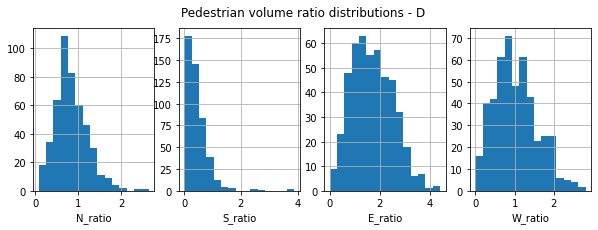

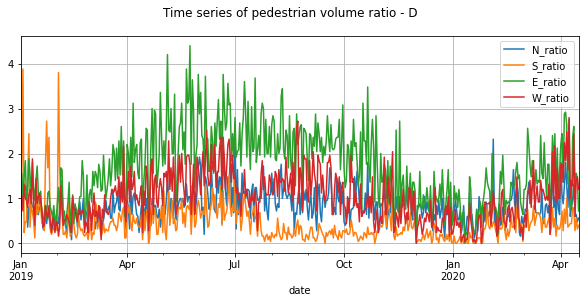

In [32]:
# Calculate the ratio of crossing counts
df_r['N_ratio'] = df_r['ped_N'] / (0.25*(df_r['ped_S'].mean() + df_r['ped_N'].mean() + df_r['ped_E'].mean() + df_r['ped_W'].mean()))
df_r['S_ratio'] = df_r['ped_S'] / (0.25*(df_r['ped_S'].mean() + df_r['ped_N'].mean() + df_r['ped_E'].mean() + df_r['ped_W'].mean()))
df_r['W_ratio'] = df_r['ped_W'] / (0.25*(df_r['ped_S'].mean() + df_r['ped_N'].mean() + df_r['ped_E'].mean() + df_r['ped_W'].mean()))
df_r['E_ratio'] = df_r['ped_E'] / (0.25*(df_r['ped_S'].mean() + df_r['ped_N'].mean() + df_r['ped_E'].mean() + df_r['ped_W'].mean()))

# Plot the distribution of ratios
fig, axs = plt.subplots(1,4, figsize=(10, 3))
fig.suptitle('Pedestrian volume ratio distributions - ' + aggregation)

for i, data in enumerate(['N_ratio', 'S_ratio', 'E_ratio', 'W_ratio']):
    df_r[data].hist(ax=axs[i], bins=15)
    axs[i].set_xlabel(data)


# Plotting the time series of Ped counts ratios
fig, axs = plt.subplots(1, figsize=(10, 4))
fig.suptitle('Time series of pedestrian volume ratio - ' + aggregation)
df_r.N_ratio.plot(ax=axs)
df_r.S_ratio.plot(ax=axs)
df_r.E_ratio.plot(ax=axs)
df_r.W_ratio.plot(ax=axs)
axs.grid()
axs.legend()